# NLP With Hotel Review Part 1

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data into dataframe
df = pd.read_csv('data/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
# Q1.1
df.shape

(515738, 17)

This is a very large dataset with 515,738 rows and 17 columns.

In [4]:
# Making column names all lower-case for ease of use
df.columns = df.columns.str.lower()

In [5]:
# Checking columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [6]:
# Q1.2 rounding review scores to integer values
df['reviewer_score'] = df['reviewer_score'].round()

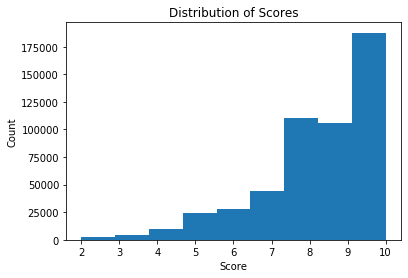

In [7]:
# Q1.3 checking distribution of review scores - wouldn't expect a normal distribution
plt.figure()
plt.hist(df['reviewer_score'], bins=9) #bins at 9 because no values at 1
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [8]:
df['reviewer_score'].value_counts()

10.0    187744
8.0     110155
9.0     105722
7.0      44088
6.0      27800
5.0      24188
4.0       9436
3.0       4406
2.0       2199
Name: reviewer_score, dtype: int64

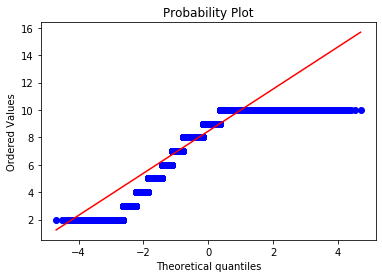

In [9]:
# Q1.3 cont. checking distribution with QQ plot
from scipy import stats

plt.figure()
stats.probplot(df['reviewer_score'], dist="norm", plot = plt);
plt.show();

Q1.4

As the distribution is not normal in this case, we cannot assume the central limit theorem is in effect. In effect we cannot rely on the summary statistics of the data set (mean, standard deviation) as accurate descriptors. Non-parametric modelling methods (K nearest neighbours, decision tree, SVM) will most likely be more useful.

Q2

Numeric Columns:
- additional number of scoring
- average score
- review total negative word counts
- total number of reviews
- review total positive word counts
- total number of reviews reviewer has given
- reviewer score

Non-numeric columns:
- hotel address
- review date
- hotel name
- reviewer nationality
- negative review
- positive review
- tags
- days since last review

Non-numeric columns that could be converted:
- days since review
- could convert tags column to is business trip with 1/0


In [10]:
# Sampling 20% of data to reduce size for quicker runtimes
df = df.sample(frac=0.2, random_state=7)

In [11]:
# Converting reviewer score to 1/0
df.loc[df['reviewer_score'] < 9, 'reviewer_score'] = 0
df.loc[df['reviewer_score'] != 0, 'reviewer_score'] = 1

In [12]:
# Removing ' days' and ' day' from column
df['days_since_review'] = df['days_since_review'].str.replace(' days', '').str.replace(' day', '')
# Converting type from string to int
df['days_since_review'] = df['days_since_review'].astype(int)

# Creating new column for business trip/leisure trip
df['business_trip'] = 1
# Placing 0's where tag Leisure trip shows up
df.loc[df['tags'].str.contains(' Leisure trip '), 'business_trip'] = 0

In [13]:
# checking
df.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng', 'business_trip'],
      dtype='object')

In [14]:
# Dropping non-numeric columns except negative_review and positive_review
df = df.drop(columns=['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'tags'])
df.columns

Index(['additional_number_of_scoring', 'average_score', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'business_trip'],
      dtype='object')

In [15]:
# split data into independent(X) and dependent(y) variables
X = df.drop(columns='reviewer_score')
y = df['reviewer_score']

# checking
print(X.shape, y.shape)

(103148, 12) (103148,)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [17]:
# New vector for positive reviews, words must show up in 2% or more of the documents

# Initializing and fitting to training data
CV_pos = CountVectorizer(min_df = 0.02, stop_words="english").fit(X_train['positive_review'])

# Transforming training and test sets
X_train_pos = CV_pos.transform(X_train['positive_review'])
X_test_pos = CV_pos.transform(X_test['positive_review'])

# Checking sparse matrix shape
X_train_pos

<72203x59 sparse matrix of type '<class 'numpy.int64'>'
	with 295456 stored elements in Compressed Sparse Row format>

In [18]:
# New vector for negative reviews, words must show up in 2% or more of the documents

# Initializing and fitting to training data
CV_neg = CountVectorizer(min_df = 0.02, stop_words="english").fit(X_train['negative_review'])

# Transforming training and test sets
X_train_neg = CV_neg.transform(X_train['negative_review'])
X_test_neg = CV_neg.transform(X_test['negative_review'])

# Checking sparse matrix shape
X_train_neg

<72203x43 sparse matrix of type '<class 'numpy.int64'>'
	with 144261 stored elements in Compressed Sparse Row format>

In [19]:
# dropping unvectorized positive and negative review columns
X_train = X_train.drop(['positive_review', 'negative_review'], axis=1)
X_test = X_test.drop(['positive_review', 'negative_review'], axis=1)
X_train.shape

(72203, 10)

In [21]:
# Creating dataframes to merge with current X_train and X_test

# Positive training data 
X_train_p = pd.DataFrame(columns = CV_pos.get_feature_names(), data = X_train_pos.toarray())

# Negative training data
X_train_n = pd.DataFrame(columns = CV_neg.get_feature_names(), data = X_train_neg.toarray())

# Positive testing data
X_test_p = pd.DataFrame(columns = CV_pos.get_feature_names(), data = X_test_pos.toarray())

# Negative testing data
X_test_n = pd.DataFrame(columns = CV_neg.get_feature_names(), data = X_test_neg.toarray())

In [22]:
# Resetting index for training data so concatenation proceeds smoothly 
X_train.reset_index(inplace=True)
X_train.index

RangeIndex(start=0, stop=72203, step=1)

In [23]:
# Concatenating training data and assigning to X_train
X_train = pd.concat([X_train, X_train_p, X_train_n], axis=1)

In [24]:
# Checking final dataframe
X_train.head()

,index,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,...,service,shower,small,staff,stay,time,wasn,water,wifi,work
0,49114,52,8.5,0,283,10,1,102,48.866859,2.302821,...,0,0,0,0,0,0,0,0,0,0
1,460988,926,8.2,12,5770,6,1,569,52.368130,4.844085,...,1,0,0,0,0,0,0,0,0,0
2,183018,154,8.0,25,768,2,77,711,51.512676,-0.186783,...,0,0,0,1,0,0,0,0,0,0
3,309871,514,8.9,0,7108,34,12,29,52.314371,4.938806,...,0,0,0,0,0,0,0,0,0,0
4,473371,221,7.5,20,3811,0,8,312,45.499520,9.206138,...,0,0,0,1,0,0,0,0,0,0


In [25]:
# resetting index for test data so concatenation proceeds smoothly
X_test.reset_index(inplace=True)
X_test.index

RangeIndex(start=0, stop=30945, step=1)

In [26]:
# concatenating and assigning to X_test
X_test = pd.concat([X_test, X_test_p, X_test_n], axis=1)

In [27]:
# checking for issues
X_test.head()

,index,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,lat,lng,...,service,shower,small,staff,stay,time,wasn,water,wifi,work
0,142846,1198,8.5,4,6596,2,1,614,51.512974,-0.183743,...,0,0,0,0,0,0,0,0,0,0
1,421738,726,8.6,0,4530,34,1,168,52.341943,4.875960,...,0,0,0,0,0,0,0,0,0,0
2,126163,995,8.1,11,3826,14,5,276,51.504348,-0.033444,...,0,0,0,0,0,0,0,1,0,0
3,181195,832,9.1,41,4672,15,4,306,51.510237,-0.076443,...,0,0,0,0,0,0,0,0,0,0
4,324699,128,9.4,5,1353,19,2,636,48.197550,16.368640,...,0,0,0,0,0,0,0,0,0,0


Q3.5

The min_df parameter is used for removing terms that appear infrequently. 
Default: min_df = 1, ensures that words that aren't present in at least one document are included. We can use min_df as a ratio as well to ignore words which appear in less than a certain proportion of the reviews.
We have set min_df=0.2 to cut down on possible noise due to the size of the set

